In [1]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from file_handler import FileHandler
from df_selector import *
from df_cleaner import *
from df_visualizer import *
from app_logger import *

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

In [4]:
file_handler = FileHandler()

# Reading Data

In [5]:
# reading the csv file
df = file_handler.read_csv("../data/BrentOilPrices.csv")
df.head(10)

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63
5,27-May-87,18.60
6,28-May-87,18.60
7,29-May-87,18.58
8,01-Jun-87,18.65
9,02-Jun-87,18.68


# General statistics

In [6]:
# number of elements in the df
df.size

18022

In [7]:
df.count()

Date     9011
Price    9011
dtype: int64

In [8]:
df.shape

(9011, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


# Missing Values

In [10]:
missing_df = missing_values_table(df)

Your selected dataframe has 2 columns.
There are 0 columns that have missing values.


In [11]:
missing_df

In [12]:
# number of rows with missing values for the whole dataset
count_missing_rows(df)

0 rows(0.0%) contain atleast one missing value.


# Data Types

In [13]:
#check if there are columns with mixed data types.
show_cols_mixed_dtypes(df)

None of the columns contain mixed types.


In [14]:
df.dtypes

Date      object
Price    float64
dtype: object

In [15]:
# get the columns with object data type
string_columns = df.select_dtypes(include='object').columns.tolist()
string_columns

['Date']

In [16]:
convert_to_string(df, string_columns)

In [17]:
convert_to_datetime(df, ['Date'])

In [18]:
df.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [19]:
df.head(5)

,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


# Duplicates

In [20]:
# search for duplicate rows and drop them
drop_duplicates(df)

No duplicate rows were found.


In [21]:
df.duplicated(subset=['Date']).all()

np.False_

# Feature Engineering

## Aggregate Features

In [22]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Date,9011,2005-02-10 23:46:53.760958720,1987-05-20 00:00:00,1996-03-20 12:00:00,2005-02-02 00:00:00,2014-01-09 12:00:00,2022-11-14 00:00:00,NaN
Price,9011.0,48.420782,9.1,19.05,38.57,70.09,143.95,32.86011


In [23]:
df['year'] = df['Date'].apply(lambda x: x.year)
df['month'] = df['Date'].apply(lambda x: x.month)
df['day'] = df['Date'].apply(lambda x: x.day)


In [24]:
df.head()

,Date,Price,year,month,day
0,1987-05-20,18.63,1987,5,20
1,1987-05-21,18.45,1987,5,21
2,1987-05-22,18.55,1987,5,22
3,1987-05-25,18.60,1987,5,25
4,1987-05-26,18.63,1987,5,26


In [25]:
df.tail()

,Date,Price,year,month,day
9006,2022-11-08,96.85,2022,11,8
9007,2022-11-09,93.05,2022,11,9
9008,2022-11-10,94.25,2022,11,10
9009,2022-11-11,96.37,2022,11,11
9010,2022-11-14,93.59,2022,11,14


In [26]:
df.dtypes

Date     datetime64[ns]
Price           float64
year              int64
month             int64
day               int64
dtype: object

# Ubivariate Analysis

In [27]:
plotly_plot_hist(df, 'Price')

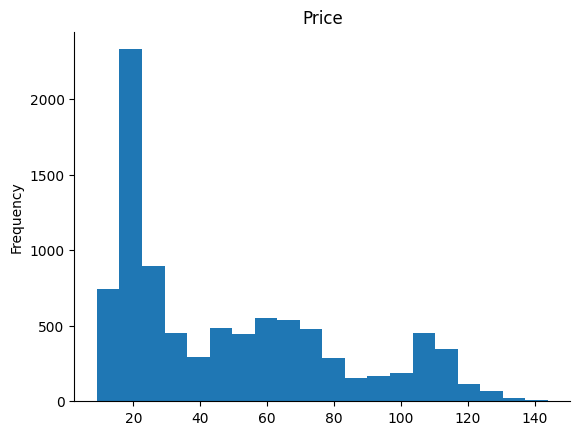

In [28]:

df['Price'].plot(kind='hist', bins=20, title='Price')
plt.gca().spines[['top', 'right',]].set_visible(False)

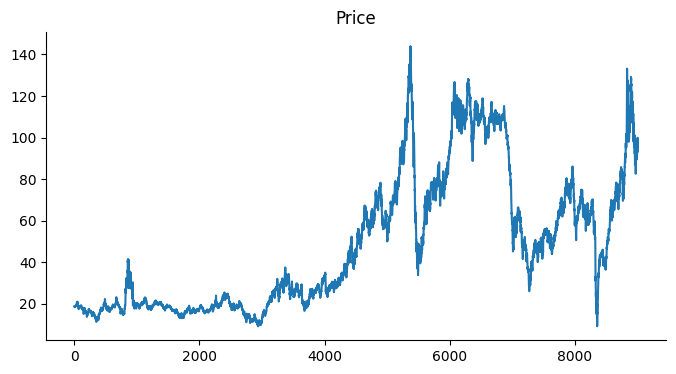

In [29]:

df['Price'].plot(kind='line', figsize=(8, 4), title='Price')
plt.gca().spines[['top', 'right']].set_visible(False)

In [30]:
plotly_plot_hist(df, 'year')

# Bivariate Analysis

## Price and year

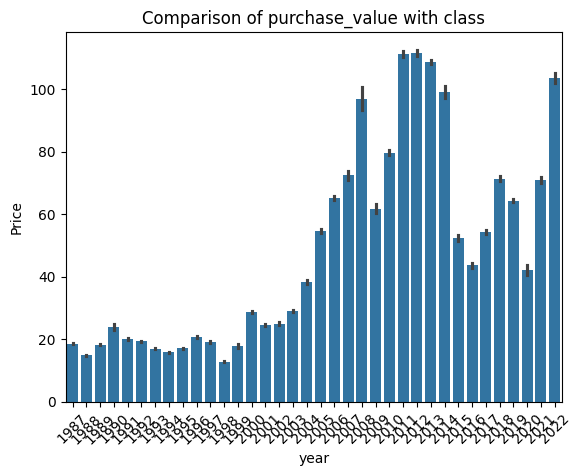

In [31]:

sns.barplot(x='year', y='Price', data=df).set_title('Comparison of purchase_value with class')
plt.xticks(rotation=45)
plt.show()

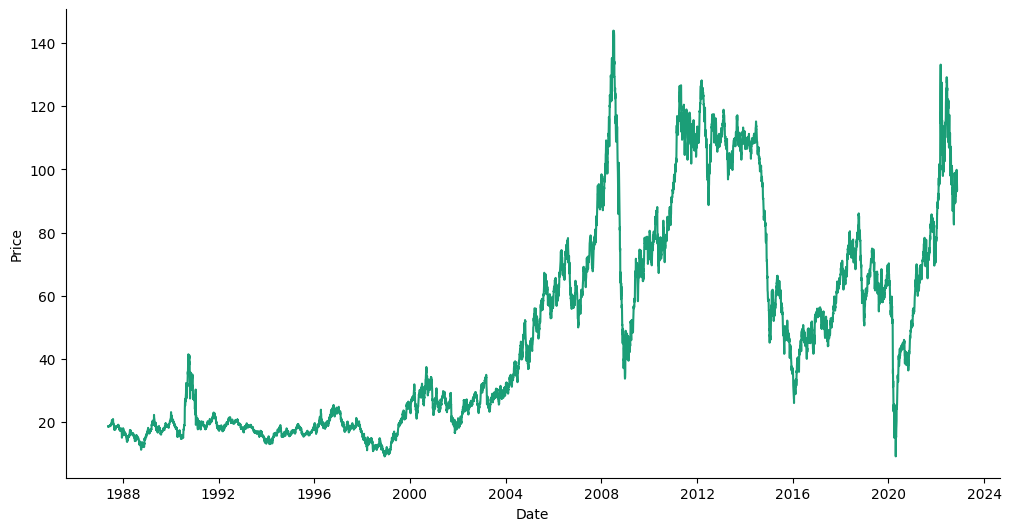

In [32]:
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Price']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('Price')

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

from ruptures.detection import pelt
from ruptures.costs import CostL2
import ruptures as rpt



In [38]:
try:
	import ruptures
except ModuleNotFoundError:
	print("The module 'module_name' is not installed. ")
	# You can include additional instruction here, such as installing the module.
else:
	# Code to run if the module is successfully imported
	print(" Module 'module_name' is installed. ")


 Module 'module_name' is installed. 


In [ ]:
df.set_index('Date', inplace=True)
prices = df['Price'].values

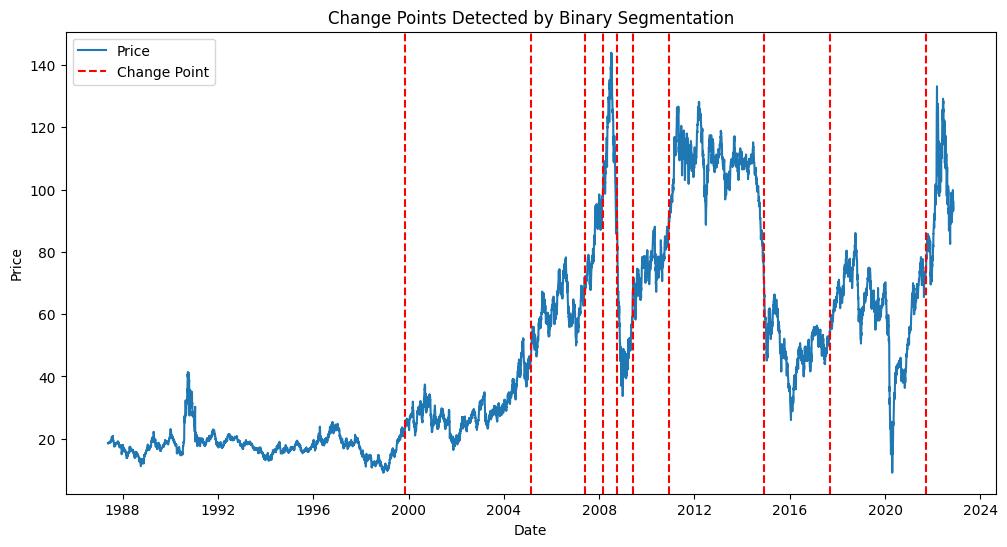

In [40]:
model = "l2"
algo = rpt.Binseg(model=model).fit(prices)
result = algo.predict(n_bkps=10)

#Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, prices, label='Price')
for cp in result[:-1]:
    plt.axvline(df.index[cp], color='r', linestyle='--', label = 'Change Point' if cp == result[0] else "")
plt.title("Change Points Detected by Binary Segmentation")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

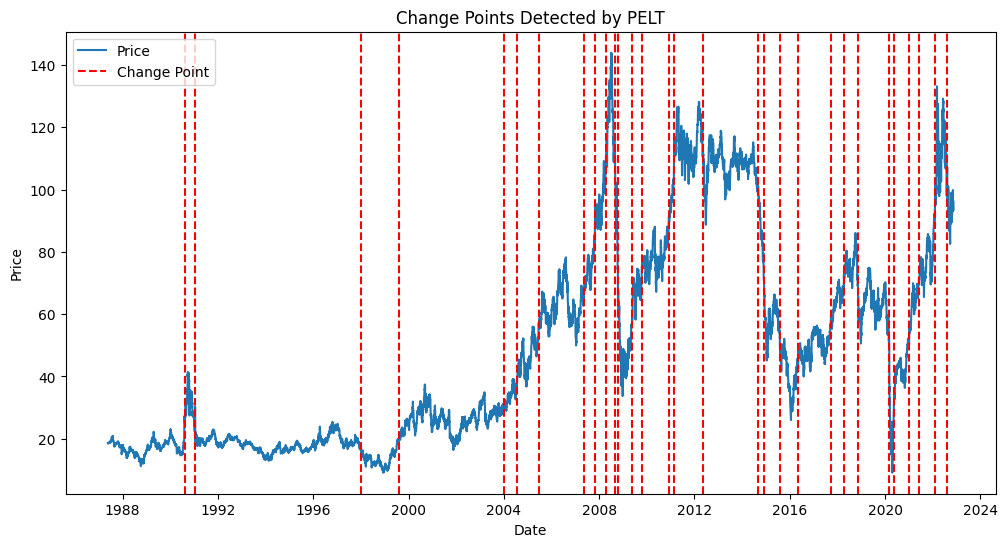

In [41]:
model = "rbf"
algo = rpt.Pelt(model=model).fit(prices)
result = algo.predict(pen=10)

#Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, prices, label='Price')
for cp in result[:-1]:
    plt.axvline(df.index[cp], color='r', linestyle='--', label = 'Change Point' if cp == result[0] else "")
plt.title("Change Points Detected by PELT")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
df.head()

,Price,year,month,day
Date,,,,
1987-05-20,18.63,1987,5,20
1987-05-21,18.45,1987,5,21
1987-05-22,18.55,1987,5,22
1987-05-25,18.60,1987,5,25
1987-05-26,18.63,1987,5,26


Detected change points:
1990-08-06 00:00:00
1991-01-16 00:00:00
1997-12-29 00:00:00
1999-08-09 00:00:00
2003-12-29 00:00:00
2004-07-27 00:00:00
2005-06-16 00:00:00
2007-05-18 00:00:00
2007-10-24 00:00:00
2008-04-11 00:00:00
2008-09-03 00:00:00
2008-10-15 00:00:00
2009-05-21 00:00:00
2009-10-13 00:00:00
2010-11-30 00:00:00
2011-02-17 00:00:00
2012-05-15 00:00:00
2014-09-08 00:00:00
2014-12-02 00:00:00
2015-08-04 00:00:00
2016-05-10 00:00:00
2017-09-19 00:00:00
2018-04-10 00:00:00
2018-11-08 00:00:00
2020-03-09 00:00:00
2020-05-21 00:00:00
2021-01-06 00:00:00
2021-06-01 00:00:00
2022-02-04 00:00:00
2022-08-04 00:00:00


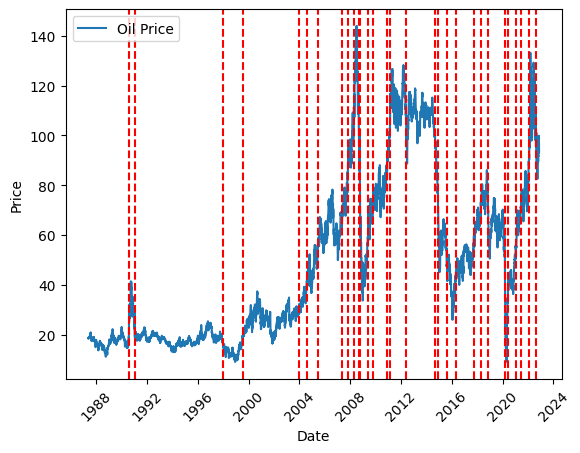

In [43]:
df2 = file_handler.read_csv("../data/BrentOilPrices.csv")
dates = pd.to_datetime(df2['Date'])
price = df2['Price'].values

model = "rbf"
algo = rpt.Pelt(model=model).fit(price)
result = algo.predict(pen=10)

# Extract changepoint dates
changepoint_dates = dates[result[:-1]]

# Print changepoint dates
print("Detected change points:")
for df in changepoint_dates:
    print(df)

# Plot results
fig, ax = plt.subplots()
ax.plot(dates, prices, label='Oil Price')
for bkpt in result[:-1]:
    ax.axvline(x=dates[bkpt], color='r', linestyle='--')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
ax.legend()
plt.xticks(rotation=45)
plt.show()


